<a href="https://colab.research.google.com/github/kavita55/Data-Science-and-Business-Analytics-Spark-Foundation-Internship/blob/main/Task_3_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 3 : Exploratory Data Analysis-Retail**
## Objective : Analyzing "Sample_Store_Dataset" dataset and try to find out the weak areas where you can work to make more profit.
###  Author : Kavita Mali

# Steps done :
- Data Understanding
  - importing libraries
  - reading data file
  - inspecting Dataframe
- Data Cleaning
- Sanity Checks
  - Outlier Analysis
- **Data Visualization**

# 1. Basic Requirements 

> #### 1.1 Importing all the required libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Importing requred libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 300) #Setting column display limit
plt.style.use('ggplot') #Applying style to graphs

import plotly
import os #accessing directory structure
import plotly.express as px

#Supressing warnings
import warnings
warnings.filterwarnings('ignore')

> #### 1.2 Loading the data

In [ ]:
#Loading the data set
retail_data = pd.read_csv("/content/drive/MyDrive/SampleSuperstore.csv")
retail_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# 2. Inspecting the Dataframe

> #### 2.1 Checking the rows and columns of the Dataframe by using shape

In [ ]:
#Checking the shape of the dataset
retail_data.shape

(9994, 13)

> #### 2.2 Checking the summary of Dataframe

In [ ]:
#Checking the summary
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


> #### 2.3 Checking the statistical summary of the Dataframe

In [ ]:
#Checking the statistical summary
retail_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


- Observing above table, we can observe that data contains outliers.

> #### 2.4 Changing datatypes to categorical


In [ ]:
#Changing dtype of "Ship Mode" from object to category
retail_data["Ship Mode"] = retail_data["Ship Mode"].astype('category')

#Changing dtype of "Segment" from object to category
retail_data["Segment"] = retail_data["Segment"].astype('category')

#Changing dtype of "Country" from object to category
retail_data["Country"] = retail_data["Country"].astype('category')

#Changing dtype of "Region" from object to category
retail_data["Region"] = retail_data["Region"].astype('category')

#Changing dtype of "Category" from object to category
retail_data["Category"] = retail_data["Category"].astype('category')

#Changing dtype of "Sub-Category" from object to category
retail_data["Sub-Category"] = retail_data["Sub-Category"].astype('category')

# 3. Data Cleaning

> #### 3.1 Checking the percentage of null values in each column

In [ ]:
#check the percentage of null values
(retail_data.isnull().sum() / len(retail_data))*100

Ship Mode       0.0
Segment         0.0
Country         0.0
City            0.0
State           0.0
Postal Code     0.0
Region          0.0
Category        0.0
Sub-Category    0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

- There are no null values in the dataset

> #### 3.2 Checking for the  duplicate values

In [ ]:
retail_data[ retail_data.duplicated() ]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


- Dataset contains some duplicate values. This can lead to biased insights. So we will drop the duplicates


In [ ]:
#Removing duplicates from the dataset
retail_data.drop_duplicates(inplace = True, ignore_index=True)

In [ ]:
# view data
retail_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
#Again checking the shape of the dataset
retail_data.shape

(9977, 13)

> #### 3.3 Rounding the values of Sales and Profit

In [ ]:
retail_data['Sales'] = retail_data['Sales'].apply( lambda x : round(x,2))
retail_data['Profit'] = retail_data['Profit'].apply( lambda x : round(x,2))

In [ ]:
retail_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.00,41.91
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.00,219.58
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.00,6.87
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.58,5,0.45,-383.03
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.37,2,0.20,2.52


# 4. Sanity Checks

In [ ]:
#Value counts for Ship Mode
round(  (retail_data['Ship Mode'].value_counts()/ len(retail_data)) * 100 , 2)

Standard Class    59.69
Second Class      19.47
First Class       15.41
Same Day           5.43
Name: Ship Mode, dtype: float64

In [ ]:
#Value counts for Segment
round(  (retail_data['Segment'].value_counts()/ len(retail_data)) * 100 , 2)

Consumer       51.95
Corporate      30.22
Home Office    17.83
Name: Segment, dtype: float64

In [ ]:
#Value counts for Region
round(  (retail_data['Region'].value_counts()/ len(retail_data)) * 100 , 2)

West       32.00
East       28.52
Central    23.24
South      16.24
Name: Region, dtype: float64

In [ ]:
#Value counts for Category
round(  (retail_data['Category'].value_counts()/ len(retail_data)) * 100 , 2)

Office Supplies    60.26
Furniture          21.23
Technology         18.51
Name: Category, dtype: float64

In [ ]:
#Value counts for Sub-Category
round(  (retail_data['Sub-Category'].value_counts()/ len(retail_data)) * 100 , 2)

Binders        15.26
Paper          13.62
Furnishings     9.58
Phones          8.91
Storage         8.48
Art             7.97
Accessories     7.77
Chairs          6.16
Appliances      4.67
Labels          3.64
Tables          3.20
Envelopes       2.55
Bookcases       2.29
Fasteners       2.18
Supplies        1.90
Machines        1.15
Copiers         0.68
Name: Sub-Category, dtype: float64

# 5. Checking for outliers


> #### 5.1 Plotting Boxplot to detect outliers in "Sales" column

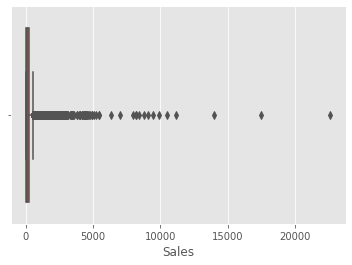

In [ ]:
#Boxplot
sns.boxplot(retail_data['Sales'])
plt.show()

>> - As we can see above "sales" column have too many outliers with a very slim boxplot.

> #### 5.2 Plotting Boxplot to detect outliers in "Profit" column

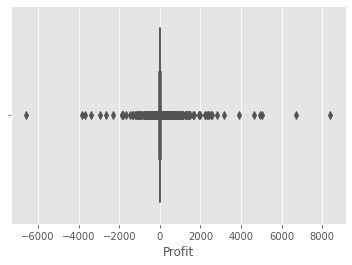

In [ ]:
#Boxplot
sns.boxplot(retail_data['Profit'])
plt.show()

>> - As we can see above "profit" column have too many outliers with a very slim boxplot.

##### As there are too many outliers we will cap the outliers to get better and unbiased insights from the data.

In [ ]:
# statistical description of the data for each quartile
perc = [0.05, 0.1, 0.25, 0.5, 0.75, 0.85, 0.90,0.95, 0.99 ]

retail_data.describe(percentiles= perc)

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000
mean,55154.964117,230.148880,3.790719,0.156278,28.690090
std,32058.266816,623.721423,2.226657,0.206455,234.457867
min,1040.000000,0.440000,1.000000,0.000000,-6599.980000
5%,10009.000000,4.980000,1.000000,0.000000,-53.110000
10%,10024.000000,7.896000,2.000000,0.000000,-15.550000
25%,23223.000000,17.300000,2.000000,0.000000,1.730000
50%,55901.000000,54.820000,3.000000,0.200000,8.670000
75%,90008.000000,209.970000,5.000000,0.200000,29.370000
85%,92627.000000,388.700000,6.000000,0.200000,58.404000


> - We will cap the data between 5% and 99%




In [ ]:
# removing (statistical) outliers for Sales
Q1 = retail_data.Sales.quantile(0.05)
Q3 = retail_data.Sales.quantile(0.95)
IQR = Q3 - Q1
retail_data = retail_data[(retail_data.Sales >= Q1 - 1.5*IQR) & (retail_data.Sales <= Q3 + 1.5*IQR)]

# outlier treatment for Profit
Q1 = retail_data.Profit.quantile(0.05)
Q3 = retail_data.Profit.quantile(0.95)
IQR = Q3 - Q1
retail_data = retail_data[(retail_data.Profit >= Q1 - 1.5*IQR) & (retail_data.Profit <= Q3 + 1.5*IQR)]




In [ ]:
#Checking the shape of the data frame again
retail_data.shape

(9729, 13)

> Outliers are removed. Lets move forward

# 6. Univariate Analysis

> #### 6.1 Checking the distribution of "Ship Mode"

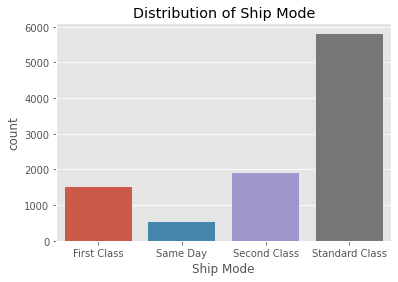

In [ ]:
# Using Countplot to plot Ship Mode
sns.countplot(retail_data['Ship Mode'])
plt.title("Distribution of Ship Mode")
plt.show()

>> - Customers seems to use **`Standard Class`** for shipping.

> #### 6.2 Checking the distribution of "Segment"

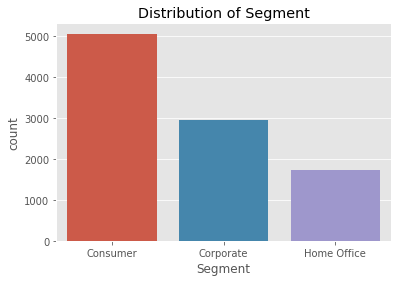

In [ ]:
# Using Countplot to plot Segment
sns.countplot(retail_data['Segment'])
plt.title("Distribution of Segment")
plt.show()

>>- Consumers are highest ordering customers as compared to Corporate and Home office

> #### 6.3 Regionwise Distribution

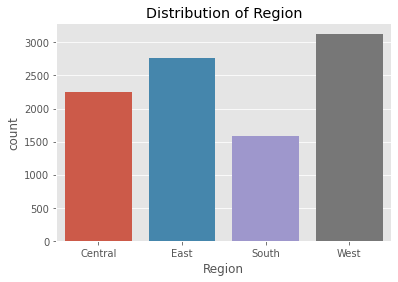

In [ ]:
# Using Countplot to plot Region
sns.countplot(retail_data['Region'])
plt.title("Distribution of Region")
plt.show()

>> - There is no such pattern, but West and East regions are most ordered region

> #### 6.4 Category wise Distribution

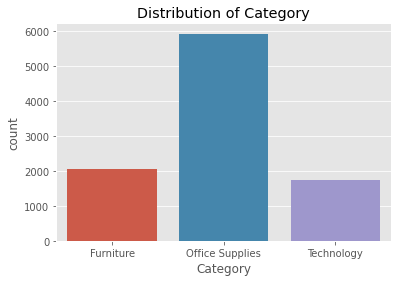

In [ ]:
# Using Countplot to plot Category
sns.countplot(retail_data['Category'])
plt.title("Distribution of Category")
plt.show()

>>- From above chart, we can observe that **Office supplies** is most ordered Category. 

> #### 6.5 Sub-Category wise Distribution

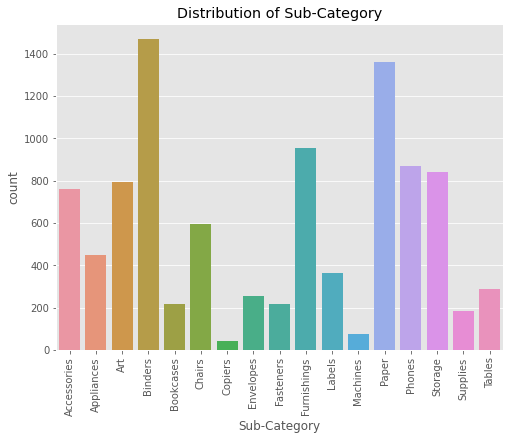

In [ ]:
# Using Countplot to plot Sub-Category
plt.figure( figsize =(8,6))
sns.countplot(retail_data['Sub-Category'])
plt.title("Distribution of Sub-Category")
plt.xticks(rotation = 90)
plt.show()

>>- Binders are **most ordered** sub-category followed by paper. Both the sub-categories belongs to "Office supply" category.
- Sub-categories like Copiers, Machines, Supplies, Fasteners, and Envelopes are less ordered as compare to others.

> #### 6.6 Distribution of Quantity

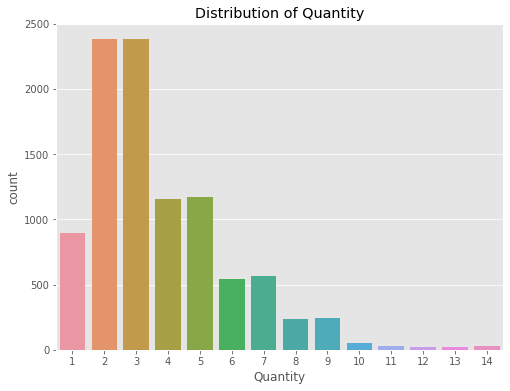

In [ ]:
# Using Countplot to plot Sub-Category
plt.figure( figsize =(8,6))
sns.countplot(retail_data['Quantity'])
plt.title("Distribution of Quantity")
plt.show()

>>- Maximum 14 products are being ordered.
- It is observed that, generally customers prefer to order 2 or 3 products at a time.

> #### 6.7 Distribution of Sales

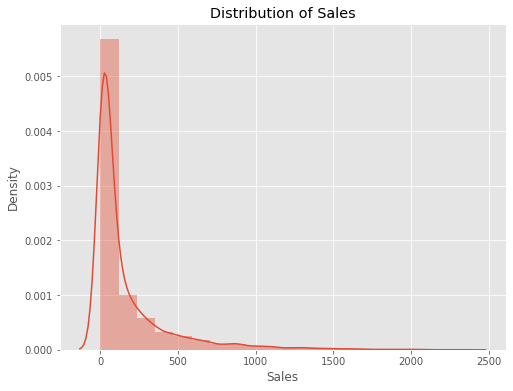

In [ ]:
# Using Countplot to plot Sales
plt.figure( figsize =(8,6))
sns.distplot(retail_data['Sales'], bins = 20)
plt.title("Distribution of Sales")
plt.show()

>>- It is highly skewed towards left.

> #### 6.8 Distribution of Profit 

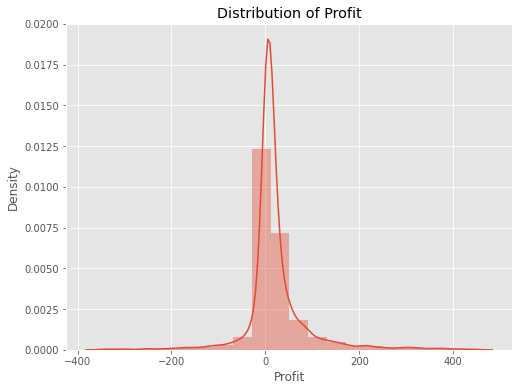

In [ ]:
# Using Countplot to plot Profit
plt.figure( figsize =(8,6))
sns.distplot(retail_data['Profit'], bins = 20)
plt.title("Distribution of Profit")
plt.show()

>>- It have very sharp curve distributed at zero

# 7.Bivariate Analysis

> #### 7.1 Sales Vs Ship Mode Vs Category


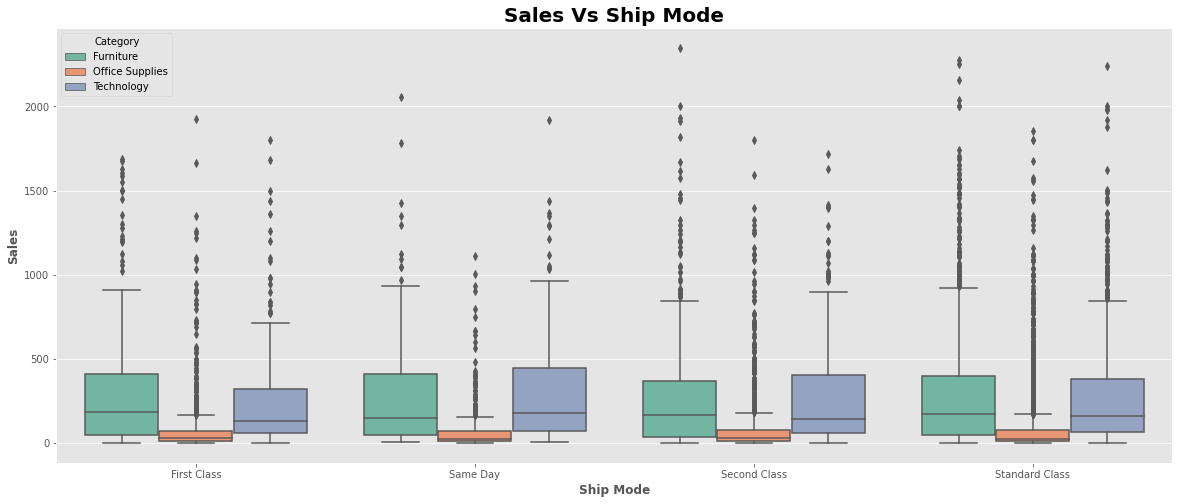

In [ ]:
## Using Boxplot to compare and hue the categories for better understanding
plt.figure( figsize = (20,8))

sns.boxplot( x = "Ship Mode", y = "Sales", data = retail_data , hue = 'Category',palette='Set2')

#Setting and formatting titles & labels
plt.title('Sales Vs Ship Mode',fontsize=20 ,fontweight = 'bold')
plt.xlabel("Ship Mode" , fontweight="bold")
plt.ylabel("Sales", fontweight="bold")

plt.show()

> __Inferences__:
- **`"Furniture" and "Technology"`** have a normal boxplot with some outliers in all the cases. But **`"Office Supplies"`** have a very slim boxplot with too many outliers.
- Approximately **`75th percentile`** of customers buy from **`"Furniture"`** category having Sales around **400 dolars** . It seems to be true in case of**`"Technology"`** also.
- Approximately 75th percentile of customers buy from "Office Supply" category having Sales around **$100**.But remaining 25th percentile of customers results in higher sales.

> #### 7.2 Sales  Vs Sub-Category Vs Ship Mode





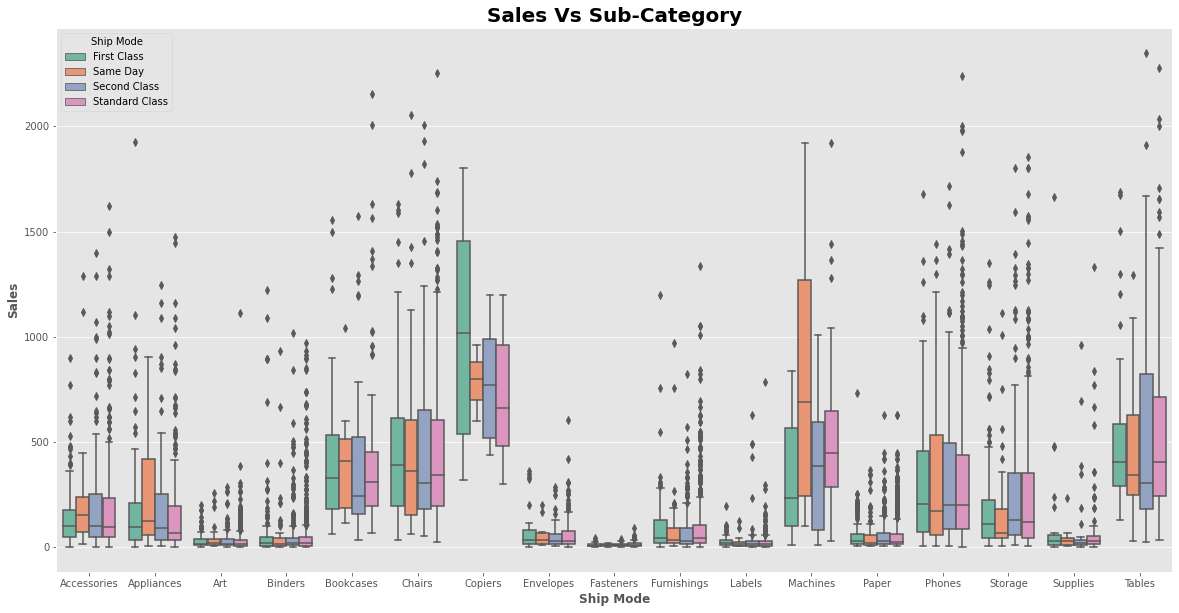

In [ ]:
## Using Boxplot to compare and hue the segment for better understanding
plt.figure( figsize = (20,10))

sns.boxplot( x = 'Sub-Category' , y = "Sales", data = retail_data , hue = "Ship Mode" ,palette='Set2')

#Setting and formatting titles & labels
plt.title('Sales Vs Sub-Category',fontsize=20 ,fontweight = 'bold')
plt.xlabel("Ship Mode" , fontweight="bold")
plt.ylabel("Sales", fontweight="bold")

plt.show()

> **Inferences** :
- **`"Fasteners", "Labels", "Supplies", "Envelopes", "Art"`** sub-categories have very low sales as compared to other sub-categories.
- **`Tables , Chairs and Bookcases`** have relatively higher sales as compared to others in easch case. All these sub-categories belogs to "Furniture".
- **`Copiers, Phones, Storage and Machines`** also have higher sales.

> #### 7.3 Profit Vs Category Vs Ship Mode

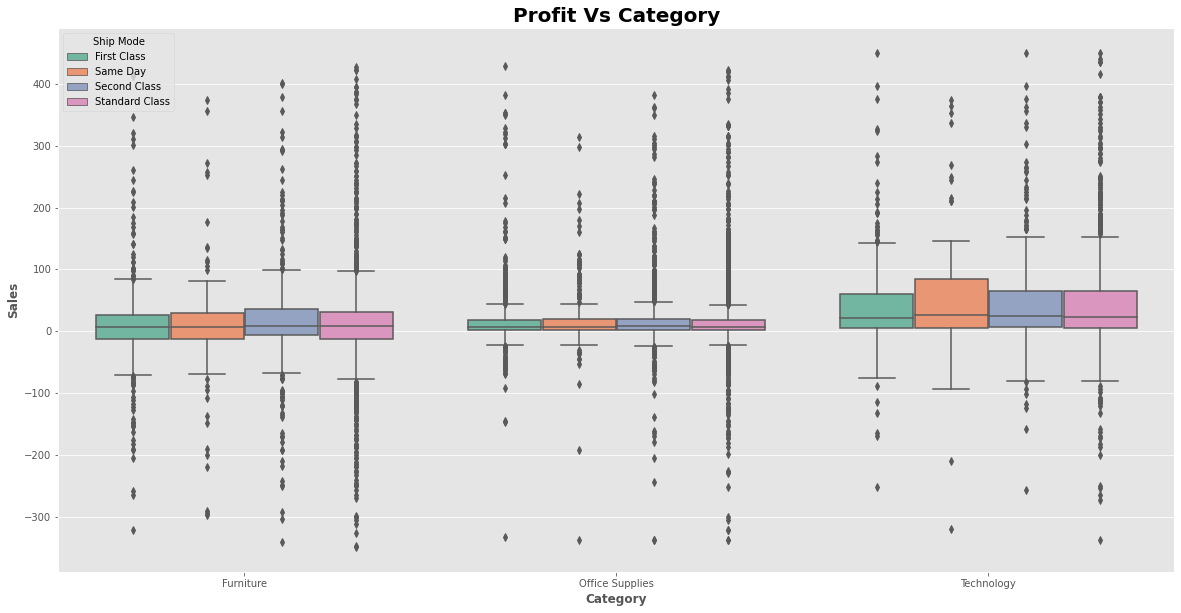

In [ ]:
## Using Boxplot to compare and hue the segment for better understanding
plt.figure( figsize = (20,10))

sns.boxplot( x = 'Category' , y = "Profit", data = retail_data , hue = "Ship Mode", palette='Set2')

#Setting and formatting titles & labels
plt.title('Profit Vs Category',fontsize=20 ,fontweight = 'bold')
plt.xlabel("Category" , fontweight="bold")
plt.ylabel("Sales", fontweight="bold")

plt.show()

> **Inferences** :
- There are not much differences among all th categories. Seems to have equal amount of profit.
- But "Office Supplies" are less likely to have negative profit(Loss).

> #### 7.4 Profit Vs Sub-Category Vs Ship Mode

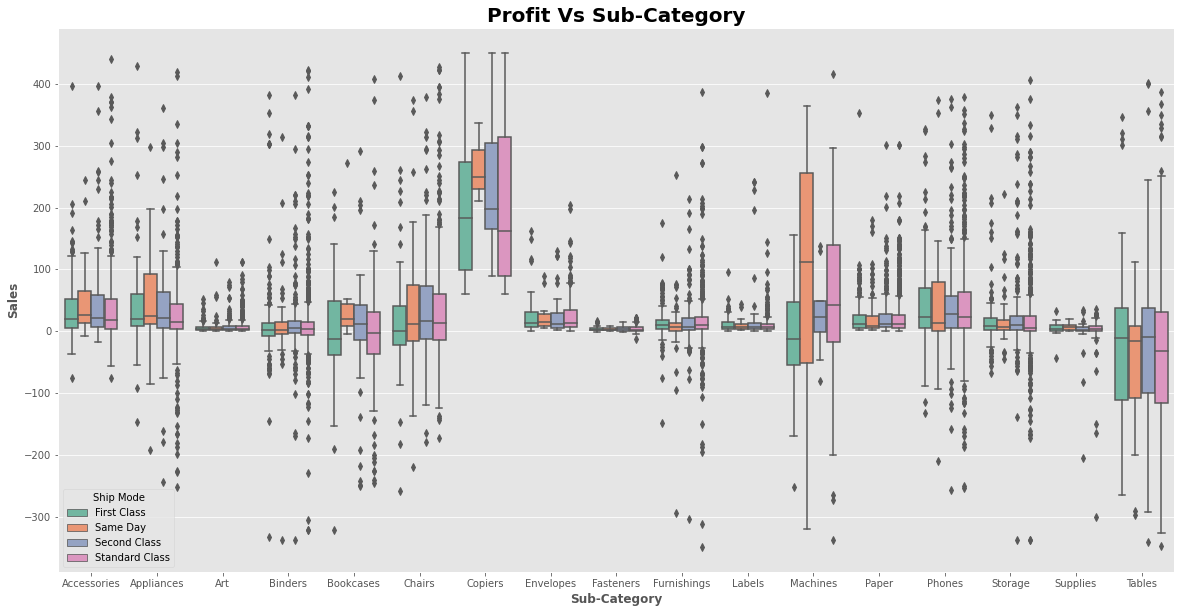

In [ ]:
## Using Boxplot to compare and hue the segment for better understanding
plt.figure( figsize = (20,10))

sns.boxplot( x = 'Sub-Category' , y = "Profit", data = retail_data , hue = "Ship Mode", palette='Set2')

#Setting and formatting titles & labels
plt.title('Profit Vs Sub-Category',fontsize=20 ,fontweight = 'bold')
plt.xlabel("Sub-Category" , fontweight="bold")
plt.ylabel("Sales", fontweight="bold")

plt.show()

> **Inferences** :
- **`"Copiers", "Paper","Envelopes", and "Art"`** are the only sub-categories having positive profit.
- All other sub-categories have positive as well as negative profit. 
- Machines which were ordered on the same day have large negative profit.
- Tables shows negative profit for all shipping modes.
- Here **`copiers`** make most of the profit compared with others.


>#### 7.5 Sales Vs Profit

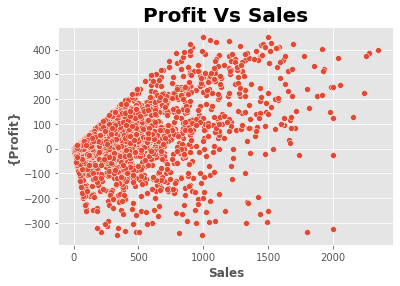

In [ ]:
# Plotting scatterplot for better understanding
sns.scatterplot(data = retail_data, x= 'Sales',y='Profit' )

#Setting and formatting titles & labels
plt.title('Profit Vs Sales',fontsize=20 ,fontweight = 'bold')
plt.xlabel("Sales" , fontweight="bold")
plt.ylabel("{Profit}", fontweight="bold")

plt.show()

> **Inferences** :
- Conclusing "Increase in Sales will increase in Profit" will not be a completely true statement. Because in some cases the statement is true. But for some cases it is completely opposite.
- Increasing sales does increase profit some cases. But Profit is decreased a lot for some cases.

>#### 7.6  States Vs Profit

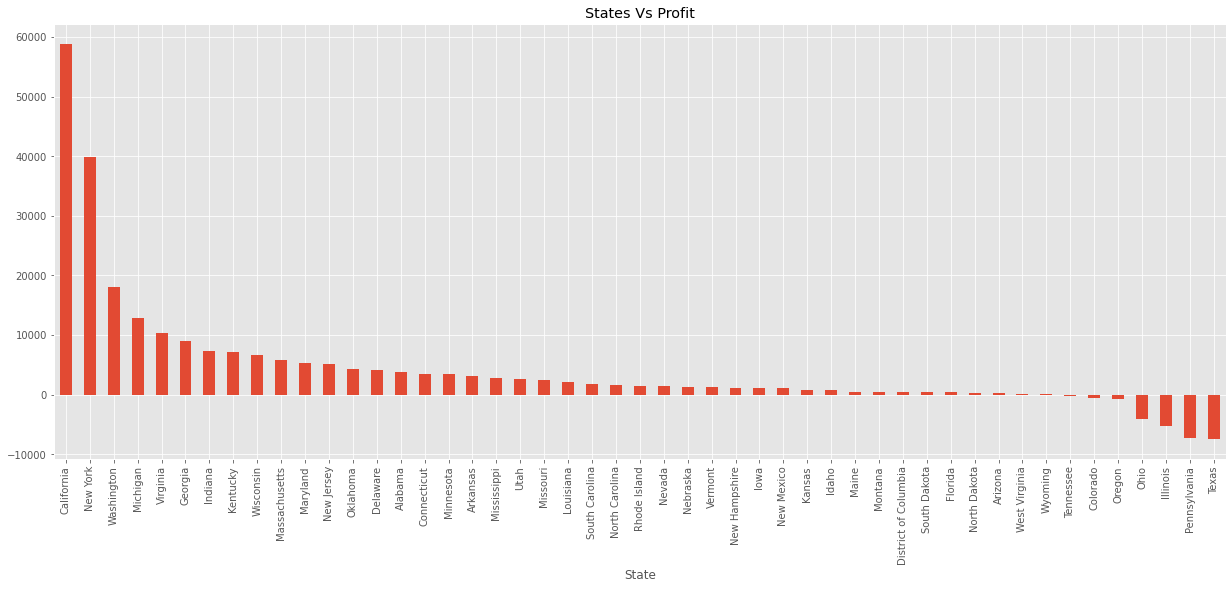

In [ ]:
plt.figure(figsize = (21,8))
retail_data.groupby('State')['Profit'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.title('States Vs Profit')
plt.show()

> **Inferences**:
- **`Callifornia`** is highest profit state followed by **`New York`** and **`Washington`**.
- **`Texas`**, **`Pennsylvania`** , **`Illinois`**, **`Ohio`** ,**`Colorado`** and **`Oregon`** are the regions where we face loss.
- Maine, Montana ,District of Columbia ,South Dakota,Florida,North Dakota,Arizona,West Virginia, Wyoming  and Tennessee  are low profit states.
- We should mainly *focus on* Callifornia, New York, Washington , Michigan and Virginia. 

> #### 7.7 Profit/Loss Vs Discount

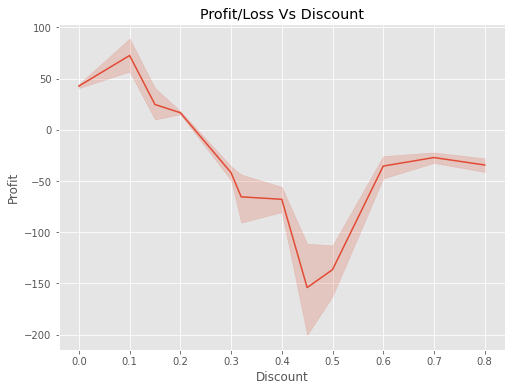

In [ ]:
plt.figure( figsize = (8,6))
# We will use line plot to evaluate relationship between profit and discount
sns.lineplot('Discount', 'Profit', data = retail_data)

#Adding and formatting title and labels
plt.xlabel('Discount')
plt.ylabel("Profit")
plt.title('Profit/Loss Vs Discount')
plt.show()

>**Inferences**:
- The discount should be about 10% so a to increase profit.
- Giving discount more than 10 % causing us a loss. 

> #### 7.8 Sub-Category Vs Discount

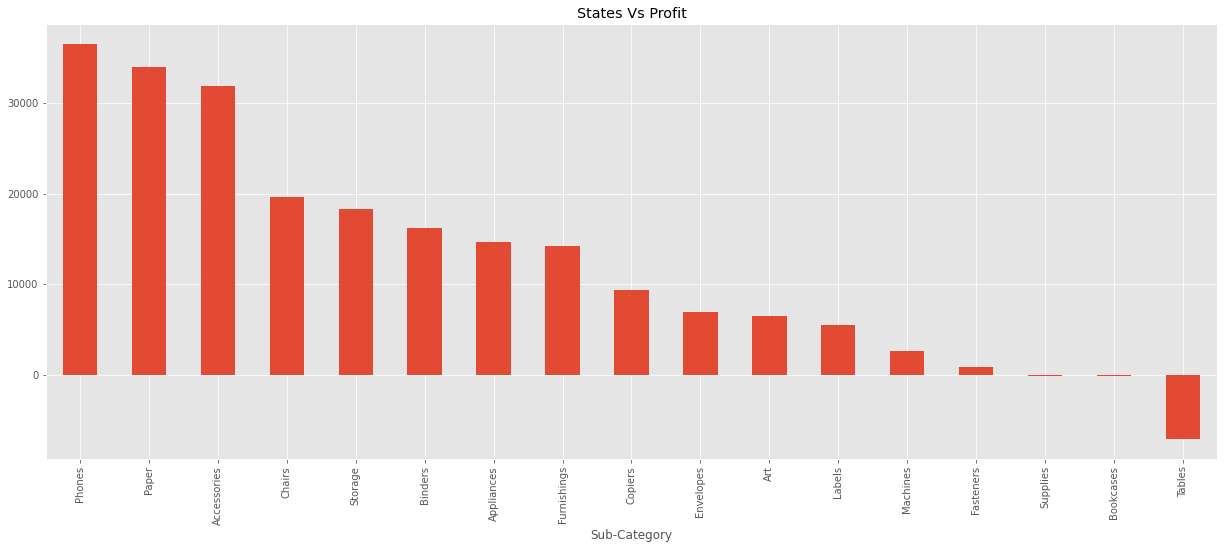

In [ ]:
plt.figure(figsize = (21,8))
retail_data.groupby('Sub-Category')['Profit'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.title('States Vs Profit')
plt.show()

> **Inferences**:
- Sub-Categories - Phones,Paper, Accessories are making highest profit.
- Fasteners, Supplies, Bookcases have lowest profit.
- Table sub-category making loss.

# 8. Multivariate Analysis

> #### 8.1 Heatmap

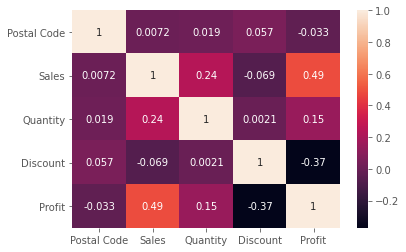

In [ ]:
sns.heatmap(retail_data.corr(),annot = True )

> **Insights**:
- Sales and Profit have a positive correlation.
- Profit and Discount have a negative correlation which means that as Discount increases profit decreases.

>#### 8.2 Sub-Category Vs Sales and Profit

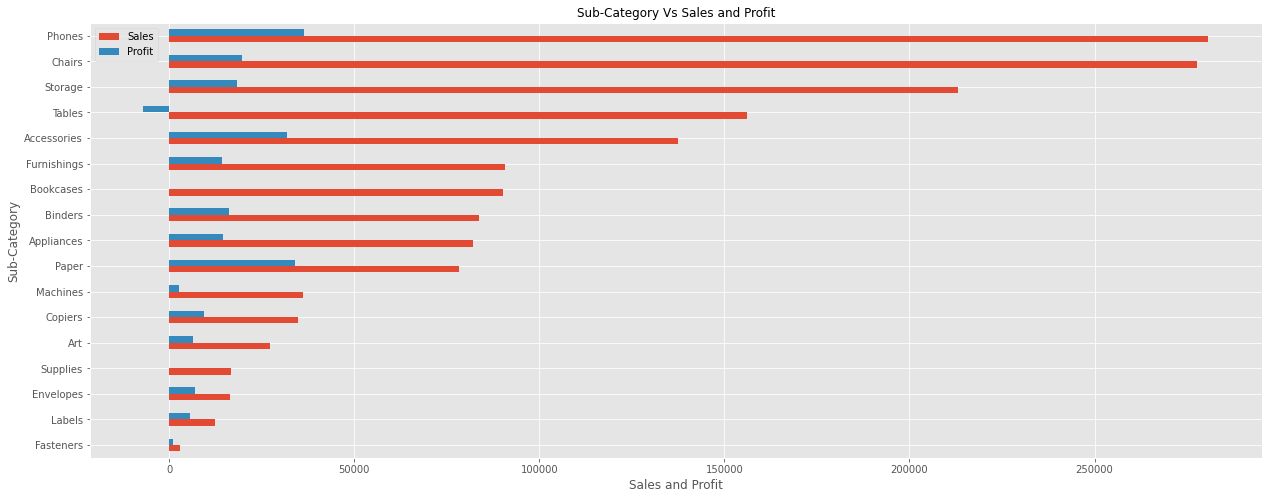

In [ ]:
#Adding barplot to visualize sales and profit sub-categorywise
retail_data.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by = 'Sales').plot(kind = 'barh',figsize = (21,8))

#Adding and formatting table
plt.title('Sub-Category Vs Sales and Profit' , fontsize = 12)
plt.xlabel('Sales and Profit')
plt.ylabel('Sub-Category')
plt.show()

>**Inferences**:
- Phones,Chairs and storage have much higher sales compared to profit.
- Tables have higher sales but it is not making any profit, it is making loss.

>#### 8.2 Category Vs Sales and Profit

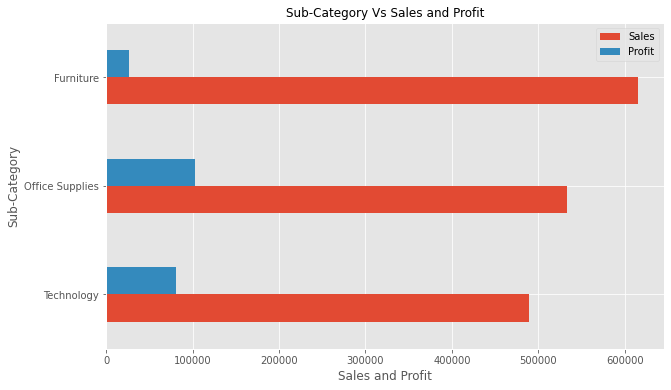

In [ ]:
#Adding barplot to visualize sales and profit sub-categorywise
retail_data.groupby('Category')[['Sales','Profit']].sum().sort_values(by = 'Sales').plot(kind = 'barh',figsize = (10,6))

#Adding and formatting table
plt.title('Sub-Category Vs Sales and Profit' , fontsize = 12)
plt.xlabel('Sales and Profit')
plt.ylabel('Sub-Category')
plt.show()

# Final Conclusion 

> #### Observations :
- Binders are most ordered sub-category followed by paper. Both the sub-categories belongs to "Office supply" category.
- Most of the customer buys 2 or 3 products.
- At the most 10% discount makes profit.

>#### Conclusion :
- We should focus more on sales of "Office-Supplies" and "Technology" as this are making more profit than the Furniture.
- We are facing loss for suub-category Tables, so we should focus less on this category.
- To generate more profit we should focus in higher profit states like Callifornia , New York and Washington.
- Texas, Pennsylvania , Illinois, Ohio ,Colorado and Oregon are the regions where we are facing loss.

